-----------------------
#### Image Compression Using Autoencoders in Keras
----------------------------

In [3]:
import tensorflow.keras.layers
import tensorflow.keras.models

In [5]:
x = tensorflow.keras.layers.Input(shape=(784, ), name="encoder_input")

#### Encoder

In [6]:
encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, 
                                                     name="encoder_dense_1")(x)

encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

In [7]:
encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, 
                                                     name="encoder_dense_2")(encoder_activ_layer1)

encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

In [8]:
encoder = tensorflow.keras.models.Model(inputs = x, 
                                        outputs= encoder_output, 
                                        name   = "encoder_model")

In [9]:
encoder.summary()

Model: "encoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dense_1 (Dense)              │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_leakyrelu_1 (LeakyReLU)      │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dense_2 (Dense)              │ (None, 2)                   │             602 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (LeakyReLU)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,102 (922.27 KB)

 Trainable params: 236,102 (922.27 KB)

 Non-trainable params: 0 (0.00 B)

#### decoder

In [13]:
decoder_input = tensorflow.keras.layers.Input(shape=(2,), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, 
                                                     name="decoder_dense_1")(decoder_input)

decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, 
                                                     name="decoder_dense_2")(decoder_activ_layer1)

decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [14]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

In [15]:
decoder.summary()

Model: "decoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_dense_1 (Dense)              │ (None, 300)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_leakyrelu_1 (LeakyReLU)      │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_dense_2 (Dense)              │ (None, 784)                 │         235,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (LeakyReLU)           │ (None, 784)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,884 (925.33 KB)

 Trainable params: 236,884 (925.33 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
ae_input = tensorflow.keras.layers.Input(shape=(784,), name="AE_input")

ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")

In [18]:
import tensorflow.keras.optimizers  

ae.compile(loss="mse", 
           optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005))

In [19]:
import tensorflow.keras.datasets
import numpy

(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()

x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig  = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test  = numpy.reshape(x_test_orig,  newshape=(x_test_orig.shape[0],  numpy.prod(x_test_orig.shape[1:])))

In [20]:
%time
history = ae.fit(  x_train, 
                   x_train, 
                   epochs=20, 
                   batch_size=256, 
                   shuffle=True, 
                   validation_data=(x_test, x_test))

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0685 - val_loss: 0.0554
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0551 - val_loss: 0.0538
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0538 - val_loss: 0.0525
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0526 - val_loss: 0.0517
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0517 - val_loss: 0.0508
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0507 - val_loss: 0.0498
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0500 - val_loss: 0.0492
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0494 - val_loss: 0.0489
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0489 - val_loss: 0.0485
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0486 - val_loss: 0.0482
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0481 - val_loss: 0.0479
Ep

In [21]:
encoded_images = encoder.predict(x_train)          # input - LS

decoded_images = decoder.predict(encoded_images)   # LS - X'

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [22]:
encoded_images[:10]

array([[-0.6097522 ,  3.93908   ],
       [10.453317  ,  2.8321524 ],
       [ 2.7458482 ,  5.1326866 ],
       [-4.818317  ,  0.16485031],
       [ 1.5474935 ,  5.4391575 ],
       [ 5.1124783 ,  4.3158154 ],
       [ 0.31183195, -0.41140667],
       [-0.9034872 ,  5.426105  ],
       [ 0.55587107, -0.5504161 ],
       [ 1.4160433 ,  2.901594  ]], dtype=float32)

In [25]:
col1, col2 = 10.453317, 2.8321524

In [26]:
col1+.000848484,col2-.0047747474

(10.454165484, 2.8273776526)

In [27]:
[[col1+.000848484,col2-.0047747474]]

[[10.454165484, 2.8273776526]]

In [31]:
import numpy as np

In [32]:
decoder.predict(np.array([[10.454165484, 2.8273776526]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[ 9.49087553e-05,  2.37667747e-03, -1.52492209e-03,
        -3.10415332e-03, -1.10651404e-02, -2.54007266e-03,
         3.75929987e-03,  1.05602341e-03, -1.50184438e-04,
        -1.35646889e-03, -1.47714221e-04,  1.57583505e-04,
         1.93904340e-03,  7.87809258e-04,  7.67988618e-04,
        -2.41853367e-03, -1.46187213e-03, -1.30221923e-03,
         1.28448009e-04, -1.07124564e-03, -4.55323985e-04,
        -8.80014675e-04, -1.17008155e-03, -1.24680903e-02,
         1.72090866e-02,  3.50937527e-03,  2.17562541e-03,
        -1.41855120e-03,  5.24557894e-04, -1.67571323e-03,
        -7.97393965e-04,  1.98771339e-03, -2.26487080e-03,
        -6.81828707e-04, -5.97618811e-04,  1.25955185e-03,
        -2.39375702e-04, -3.92331649e-03, -1.14029283e-02,
        -1.16557181e-02, -3.69313662e-03, -1.54156564e-03,
        -5.37500530e-03,  4.32224304e-04, -6.59528654e-04,
        -3.37182684e-03, -5.52848773e-03, -5.67201106e-03,
        -6.03576284e-03, -2.36871978e-03, -3.73627688e-0

In [33]:
encoded_images.shape

(60000, 2)

In [34]:
decoded_images.shape

(60000, 784)

In [35]:
decoded_images_orig = numpy.reshape(decoded_images, 
                                    newshape=(decoded_images.shape[0], 28, 28))

In [36]:
import matplotlib.pyplot

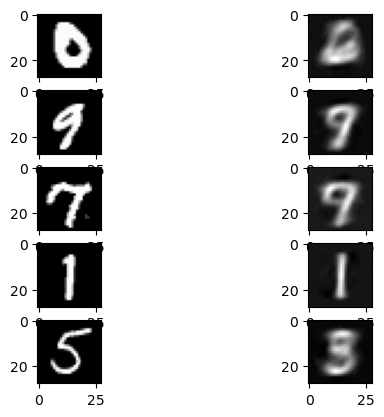

In [37]:
num_images_to_show = 5

for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

In [38]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

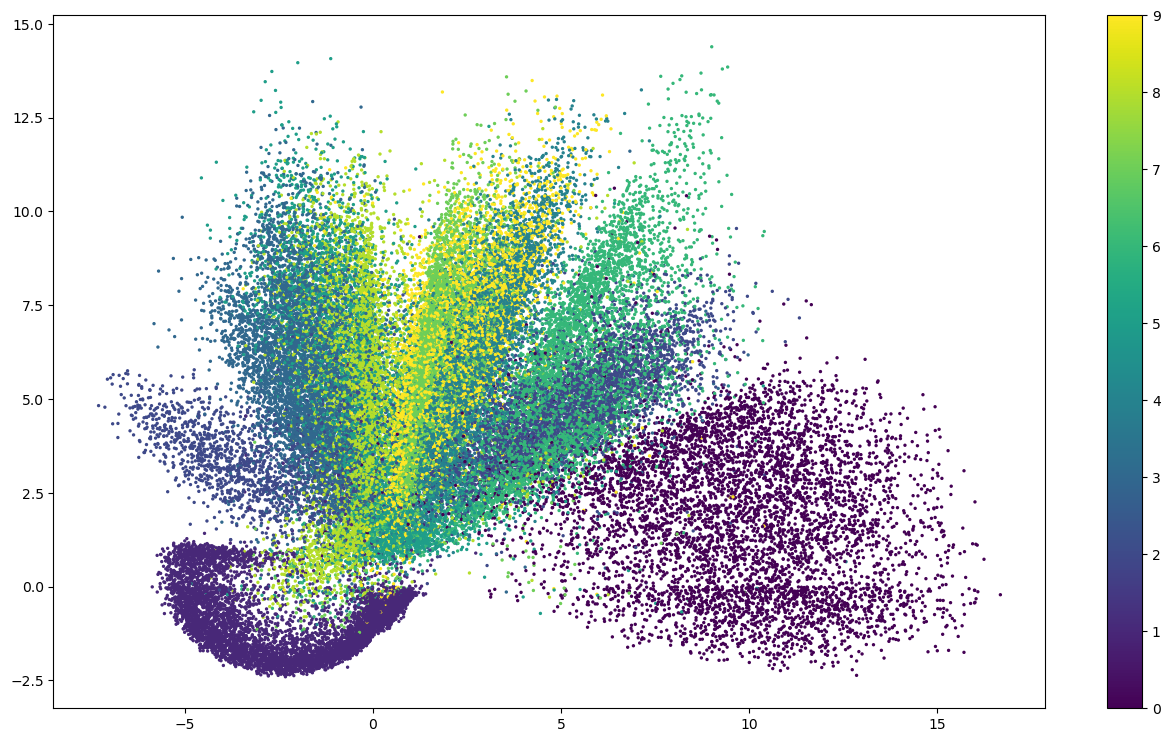

In [39]:
matplotlib.pyplot.figure(figsize=(16, 9))

matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train, marker='.', s=8) 
matplotlib.pyplot.colorbar();

#### some random input to the decoder

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


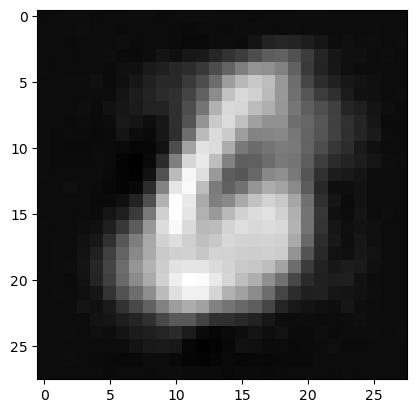

In [44]:
y_pred =decoder.predict(np.array([[ 3.5474935 ,  2.4391575 ]]))
#y_pred =decoder.predict([[col1-np.random.normal(), col2+np.random.normal()]])

y_pred_image = numpy.reshape(y_pred, 
                                    newshape=(1, 28, 28))

matplotlib.pyplot.imshow(y_pred_image[0, :, :], cmap="gray");